In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns


Gather data

In [3]:
#read in datasets
calendar_df = pd.read_csv('./dataset/calendar.csv')
listing_df = pd.read_csv('./dataset/listings.csv')
reviews_df = pd.read_csv('./dataset/reviews.csv')

Access data

In [4]:
#check data in calender df
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# check data in listing df
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
#check number of rows and columns
print(calendar_df.shape)
print(listing_df.shape)

(1393570, 4)
(3818, 92)


In [7]:
#check number of rows with unique listing df
calendar_df['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
           ... 
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length: 3818, dtype: int64

In [8]:
#check missing values in calender
calendar_df.isnull().sum()/calendar_df.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [9]:
#check percentage of missing values in calender
listing_df.isnull().sum()/calendar_df.shape[0]

id                                  0.00000
listing_url                         0.00000
scrape_id                           0.00000
last_scraped                        0.00000
name                                0.00000
                                     ...   
cancellation_policy                 0.00000
require_guest_profile_picture       0.00000
require_guest_phone_verification    0.00000
calculated_host_listings_count      0.00000
reviews_per_month                   0.00045
Length: 92, dtype: float64

Clean data

In [10]:
#drop rows with no price, 
#this technique was used because the price column is a resulting field and cannot be gotten value for
calendar_df.dropna(subset=['price'],inplace=True)

In [11]:
#check missing values in listing df
np.sum((listing_df.isnull().sum()/listing_df.shape[0])>0.50)

4

In [12]:
#drop rows with over  50% of its data missing
listing_df.dropna(axis=1,thresh=1900, inplace= True)

In [13]:
print(calendar_df.shape)
print(listing_df.shape)

(934542, 4)
(3818, 88)


In [14]:
#### make a list of column names that are not needed
to_drop= ['listing_url','scrape_id','last_scraped','experiences_offered','jurisdiction_names',
            'latitude','longitude','weekly_price','availability_30','availability_60','availability_90',
          'availability_365','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
         'review_scores_location','jurisdiction_names','neighbourhood_group_cleansed','name','summary','space','description'
         ,'xl_picture_url','host_id','host_url','host_name','host_since','neighbourhood','reviews_per_month',
       'host_location', 'host_about', 'host_response_time','neighborhood_overview','cleaning_fee',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost','first_review','last_review',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','review_scores_rating','review_scores_value',
       'host_listings_count', 'host_total_listings_count','review_scores_accuracy','review_scores_value',
       'host_verifications', 'host_has_profile_pic', 'zipcode','market','smart_location','thumbnail_url','medium_url',
        'picture_url']
#drop columns
listing_df.drop(to_drop,axis=1, inplace=True)

In [15]:
#a lamda function to strip each value in col of $ , and '' and covert to float
clean_price = lambda col: float(str(col).replace('$','').replace(',',''))

#convert price to float and strip the dollar sign
calendar_df['price']= calendar_df['price'].apply(clean_price)

listing_df['price'] =listing_df['price'].apply(clean_price)

listing_df['extra_people'] = listing_df['extra_people'].apply(clean_price)

In [16]:
#fill the Nans 
listing_df['notes'].fillna('', inplace= True)

listing_df['transit'].fillna('', inplace= True)

listing_df['host_identity_verified'].fillna(listing_df['host_identity_verified'].mode()[0], inplace=True)

listing_df['bathrooms'].fillna(listing_df['bathrooms'].mode()[0],inplace=True)

listing_df['bedrooms'].fillna(listing_df['bedrooms'].mode()[0],inplace=True)

listing_df['property_type'].fillna(listing_df['property_type'].mode()[0],inplace=True)

In [17]:
#its just one bed missing, check for the index
print(listing_df['beds'][listing_df['beds'].isnull()])

#bedrooms are suppose to be equal to beds , check true that is
print ((listing_df['bedrooms']==listing_df['beds']).sum())

#over 60% of berooms have beds)
# therefore number of bedrooms should be equal to number of beds
listing_df['beds'][1961]=listing_df['bedrooms'][1961]

1961   NaN
Name: beds, dtype: float64
2453


<ipython-input-17-9869d747f1a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_df['beds'][1961]=listing_df['bedrooms'][1961]


In [18]:

#converting date from the calendar into month 
calendar_df['month'] = calendar_df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

#converting date from the calendar into year and drop the date column
calendar_df['year'] = calendar_df.apply(lambda row: int(row['date'].split('-')[0]), axis=1)

calendar_df['day'] = calendar_df.apply(lambda row: int(row['date'].split('-')[2]), axis=1)
calendar_df.drop('date', axis = 1, inplace = True)

In [19]:
#rename id in listng_df to listing_id 
listing_df.rename(columns={'id':'listing_id'}, inplace=True)


# merge listing_df and calender_df by listing_id
df = pd.merge(calendar_df, listing_df, on='listing_id')

In [20]:
#drop more columns
drop_more = ['street', 'neighbourhood_cleansed','country_code','country','notes',
             'calendar_updated','city','available','state','requires_license', 'has_availability','transit',
             'calendar_last_scraped', 'requires_license']
df.drop(drop_more, axis = 1, inplace=True)

In [21]:
#drop the price_x
# price x is the genral price of each listing, while price y is the calendar price of each listing at 
# particular times , therefore we hold on to price_y because it is more particular.
df.drop('price_y', axis=1,inplace=True)

In [22]:
#rename price_x to price
df.rename(columns={'price_x': "price"},inplace = True)

Analyze and visualize data

#### Business-related questions

##### 1.  What is the price range for the listings?
The price ranges between 20-1200 , but most of the listing ranges between 20-280, also there are very few lisiting between 550-1200


Understanding the Data - Here we try to understand the Data by checking the price range in the data, checking to see how many of the listings are expensive and those that are less expensive. Since we are trying to determine the price of listings, Most of the data falls to less expesive category , most of the prediction might also fall in that range.


In [23]:
def plot_hist(df,col1,col2,bins=5):
    '''
    INPUT:
    df - pandas dataframe with col1 and col2 variables you want to plot
    col1 - a column name in the dataframe df to be plotted
    col2 - another column name in the dataframe df
    bins- it defines the number of equal-width bins in the range.
    OUTPUT:
    An histogram which is plotted by grouping col1 mean against col2
    '''
    grouping = df.groupby(col1).mean()[col2]
    fig, ax = plt.subplots()
    ax.hist(grouping, bins=bins);
    ax.set_xlabel(col2)
    ax.set_ylabel(col1)
    return plt.show()
    

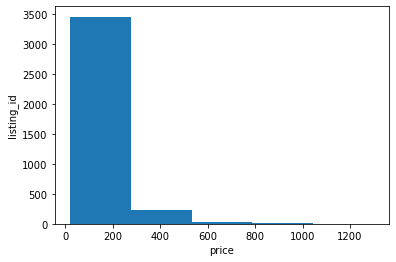

In [24]:
# #get the average price for each listing
plot_hist(df,'listing_id','price')

# #price ranges between $20-$12000
# #most of the prices are between $20-$280

##### 2.  What time of the year do we have the prices go up?
From the graph below, the prices goes up the most between june and july
prices are relatively low in months like jan-Mar and August-Dec
they are quite on the average in months like april through june and july through august


Understanding the business - Here we try to understand how the business works what time of the year does the prices of the listings go up. Seattle Winter is between December and Febuary.From the graph below the prices are usually low by this time of the year. Summer is between mid-may to September, the graphs shows the price range are on the average and finally June and July are midly warm in seattle and touring is said to be most comfortable at the time, My guess is seattle will be crawling with tourists and the listing prices sky rockets, the higher the demand the higher the prices.

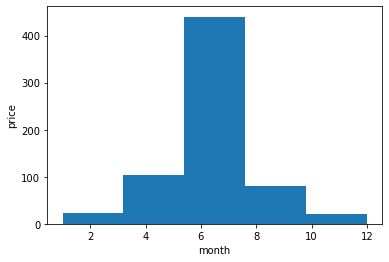

In [25]:
#get the average price of reviews per month
plot_hist(df, 'price','month')

#this shows the prices are high btween june and july

##### 3. What is highest number of reviews for a listing?
The majority of listings are concentrated around 1–50 reviews

Understanding the of data - Here we see how much review a listing gets inorder to know if the number_of review is a deciding factor. there are 365 data for each listing, thie graph show how many 'number of reviews' a lising gets at least.

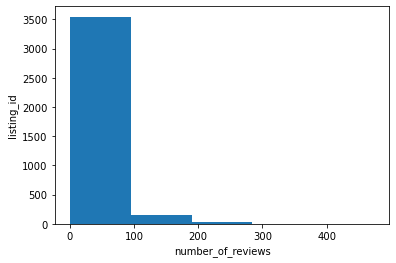

In [26]:
# get the average number of reviews per listing
plot_hist(df, 'listing_id','number_of_reviews')

##### 4. How does number of 'accommodates' affect the price of the listing?

Understanding the data and the business
Trying to see how the number of guests accommodated has a linear effect to the price of the listing
From the Graph below, it is a little unclear of the number of accomodated guests directly affects the prices. This is understandable because there are amenities that do not deoend on number of accommodation which could make the prices go up. 

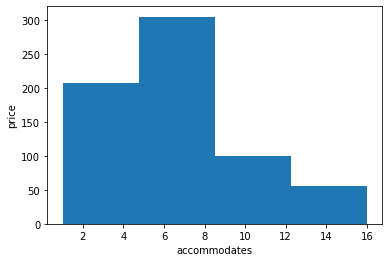

In [27]:
plot_hist(df,'price','accommodates',4)

##### 5. How does number of 'cancellation policy' affect the price of the listing?

Understanding the data and the business
Trying to see how the cancellation_policy affects the price of the listing
There are 3 cancelation policy that stats and graph below shows 'flexibilty'and 'moderate' cancelation policy listing prices are less expensive than the strict cancellation policy. 
From the Graph below, 

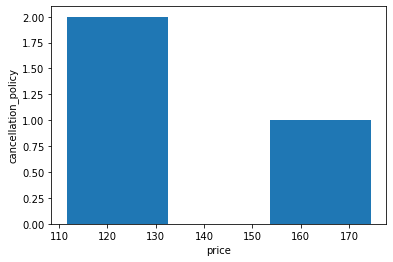

cancellation_policy
flexible    111.570504
moderate    118.260287
strict      174.569927
Name: price, dtype: float64

In [48]:
df.columns
plot_hist(df,'cancellation_policy','price',3)
df.groupby('cancellation_policy').mean()['price']

In [94]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',
                                                                 drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [95]:
# Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])

#get column name of the categorical variables
cat_cols = cat_df.columns

#create dummy data for each categorical variable
new_df = create_dummy_df(df, cat_cols, False)

In [96]:
#check if there are no missing values in the new_df
print(new_df.isnull().sum().sum())
print(new_df.shape)

0
(934542, 3250)


In [97]:
#create and independent and dependent variables X and Y
x = new_df.drop('price',axis =1)
Y = new_df['price']
x_train,x_test,y_train,y_test =train_test_split(x,Y,random_state = 42,test_size = .3)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(654179, 3249)
(280363, 3249)
(654179,)
(280363,)


The number is quite large therefore to reduce 
processing time and machine power, i ll reduce the number of data to about half

In [110]:
new_x = x[:500000]
new_Y = Y[:500000]

In [111]:
x_train,x_test,y_train,y_test =train_test_split(new_x,new_Y,random_state = 42,test_size = .3)

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(350000, 3249)
(150000, 3249)
(350000,)
(150000,)


Model data

In [113]:
 #instatiate mode
lm_model = LinearRegression(normalize =True)
lm_model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [114]:
#Predict using your model
y_test_preds = lm_model.predict(x_test)
y_train_preds = lm_model.predict(x_train)

Evaluate Scores

In [ ]:
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [109]:
print(test_score)
print(train_score)

0.9497883502911872
0.9514678973293813
